# Project03. 딥러닝 프로젝트

## 과정 개요
* Boston 주택 가격 예측 모델
여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.

* Reuters 딥러닝 모델
시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

* CIFAR10 딥러닝 모델
이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

## 학습 목표
* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습한다.
* Reuters 데이터셋을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습한다.
* CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습한다.

# Reuters 딥러닝 모델
* 로이터 뉴스 기사 데이터셋
* 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
* 뉴스기사의 주제로 46개 레이블 - **다중 분류**

### 데이터 전처리
* 텍스트 데이터를 벡터로 변환
* 일반적으로 자주 사용되는 원-핫 인코딩(one-hot encoding)을 이용하여 텍스트를 0과 1의 벡터로 변환
* 뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환 수행

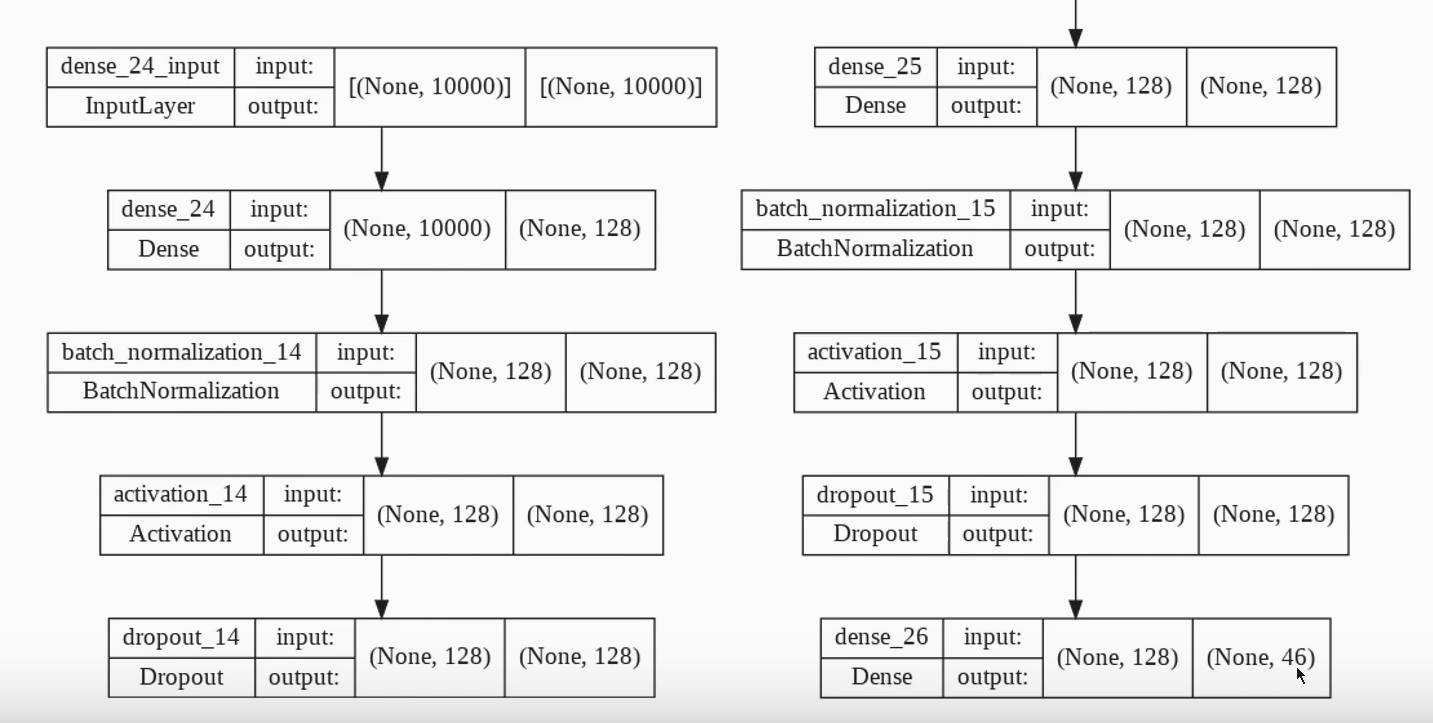
* 10000개의 feature를 가지는 이유는, 뉴스 데이터셋에서 단어의 개수를 10000개로 제한해서 받아오기 때문이다. -> 10000개의 단어로 모든 게 구성되어 있다고 가정
* 최종적으로 주제 46개로 분류

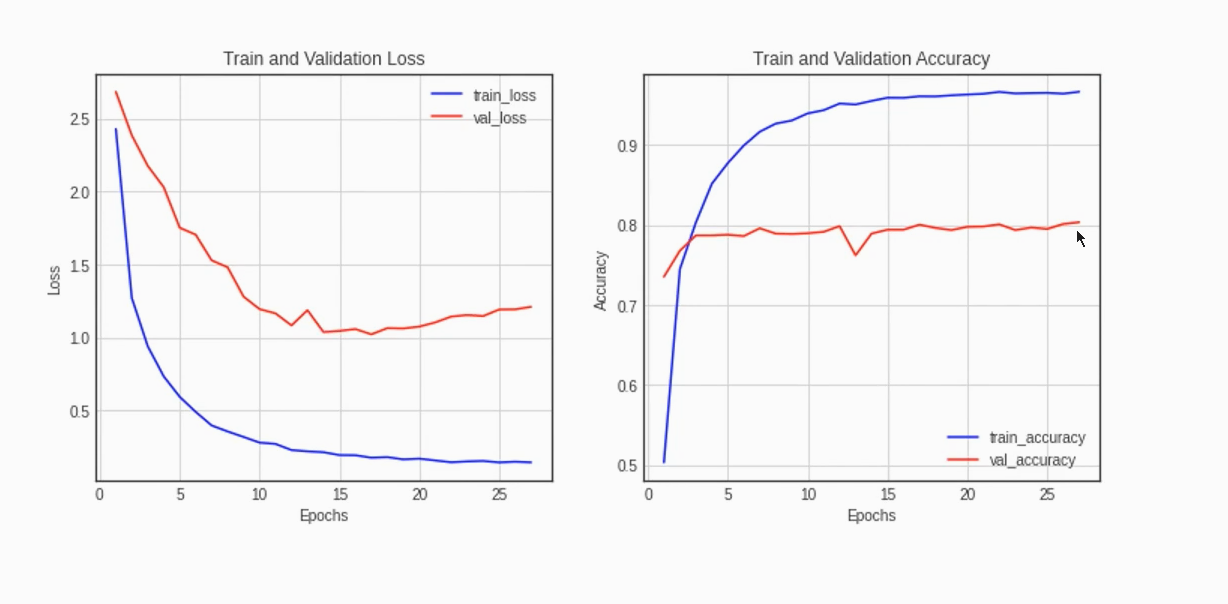
* 데이터셋에 따라서 모델의 구조 설계가 변경되어야 한다.
* 텍스트를 다루는 데에는 RNN 계열의 딥러닝 모델을 써야 한다.(+ 인코더, 디코더, 트랜스포머)

### 데이터 로드 및 전처리
* reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리한다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라미터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [3]:
# reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data_full, train_labels_full,
                                                                  test_size=0.25,
                                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [10]:
# 데이터 확인하기
print(train_data[0])
print('-'*80)
print(train_labels[0])

[1, 978, 935, 311, 23, 408, 6, 433, 6, 19, 492, 11, 82, 2, 2669, 7, 89, 9, 19, 597, 11, 7, 448, 22, 19, 653, 11, 7, 48, 4, 978, 1262, 9, 2043, 80, 81, 8853, 8, 162, 5, 935, 2, 55, 75, 1184, 6, 433, 6, 1922, 18, 82, 2235, 2669, 7, 89, 22, 3811, 18, 7, 48, 9, 713, 2736, 6, 3780, 18, 7, 448, 4, 8853, 8, 7, 10, 4144, 5, 25, 8695, 303, 1262, 9, 2470, 1190, 16, 1748, 1603, 3040, 1004, 28, 228, 4, 48, 320, 5, 321, 32, 11, 2, 7, 286, 206, 161, 6362, 2, 23, 133, 6, 30, 3025, 97, 384, 408, 935, 398, 55, 2916, 95, 1845, 24, 266, 3282, 7, 4, 76, 286, 4454, 9, 1073, 33, 351, 4, 8853, 8, 4, 1359, 6362, 1549, 84, 9, 4, 408, 246, 122, 23, 133, 6, 1099, 69, 10, 2382, 499, 7, 286, 198, 9, 260, 951, 52, 29, 16, 8, 4, 408, 535, 45, 3830, 10, 3901, 7, 122, 411, 457, 581, 225, 29, 16, 8, 4, 1192, 13, 935, 162, 43, 10, 3315, 5, 311, 1127, 389, 4, 314, 43, 54, 29, 185, 16, 34, 228, 579, 20, 5, 135, 122, 7, 105, 16, 34, 644, 20, 4, 148, 7, 162, 5, 935, 43, 10, 1257, 5, 122, 40, 958, 85, 1912, 6, 4, 433, 7, 4, 

데이터를 확인해 봤을 때 문장에 있는 각각의 단어의 인덱스 번호가 하나의 데이터로 되어 있는 것 같다.

**참고! - Reuters 딥러닝 모델의 데이터는 총 11,228개의 뉴스 기사이다. 즉. 데이터 포인트 한 개는 뉴스 기사 한 개를 의미**

* 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행한다. 원-핫 인코딩 함수를 직접 만든다.
* 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [12]:
# 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [21]:
# 데이터 확인
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [22]:
print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

23 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성 및 컴파일
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성
* L2 규제도 설정해주었다.

In [33]:
# 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.001))) # l2 규제를 진행
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(46, activation='softmax')) # 46개의 주제로 분류하는 다중 분류이기 때문에 'softmax'함수를 사용

model.summary()

model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

### 모델 학습
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [34]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5')

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data = (x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 2s 70ms/step - loss: 3.3533 - accuracy: 0.3401 - val_loss: 3.6843 - val_accuracy: 0.6336
Epoch 2/40
14/14 [==============================] - 0s 23ms/step - loss: 2.0141 - accuracy: 0.6470 - val_loss: 3.3526 - val_accuracy: 0.6812
Epoch 3/40
14/14 [==============================] - 0s 24ms/step - loss: 1.6225 - accuracy: 0.7111 - val_loss: 3.0636 - val_accuracy: 0.7106
Epoch 4/40
14/14 [==============================] - 0s 24ms/step - loss: 1.4023 - accuracy: 0.7455 - val_loss: 2.7825 - val_accuracy: 0.7168
Epoch 5/40
14/14 [==============================] - 0s 22ms/step - loss: 1.2304 - accuracy: 0.7773 - val_loss: 2.5083 - val_accuracy: 0.7213
Epoch 6/40
14/14 [==============================] - 0s 23ms/step - loss: 1.1086 - accuracy: 0.8000 - val_loss: 2.2737 - val_accuracy: 0.7226
Epoch 7/40
14/14 [==============================] - 0s 22ms/step - loss: 1.0197 - accuracy: 0.8153 - val_loss: 2.0960 - val_accuracy: 0.7182
Epoch 8/40
14

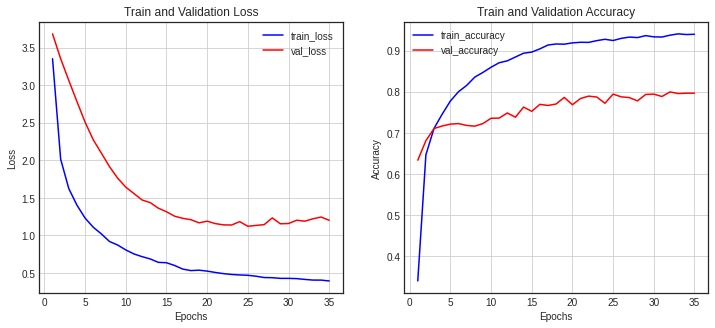

In [35]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

과적합이 발생된 것 같다.

* He 초기값을 추가
* epochs 수를 40에서 60으로 늘림

In [62]:
# 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), 
                       kernel_regularizer=regularizers.l2(0.01), # l2 규제를 진행
                       kernel_initializer='he_normal')) # he 초기값을 설정
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.01), # l2 규제를 진행
                       kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(46, activation='softmax')) # 46개의 주제로 분류하는 다중 분류이기 때문에 'softmax'함수를 사용

model.summary()

model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_23 (Batc (None, 128)               512       
_________________________________________________________________
activation_16 (Activation)   (None, 128)             

In [63]:
from tensorflow.keras import callbacks

history = model.fit(x_train, y_train, epochs=60, batch_size=300, validation_data = (x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
23/23 [==============================] - 2s 30ms/step - loss: 6.1572 - accuracy: 0.4325 - val_loss: 6.0536 - val_accuracy: 0.6719
Epoch 2/60
23/23 [==============================] - 0s 12ms/step - loss: 4.1145 - accuracy: 0.6704 - val_loss: 5.0920 - val_accuracy: 0.6768
Epoch 3/60
23/23 [==============================] - 0s 12ms/step - loss: 3.2371 - accuracy: 0.7260 - val_loss: 4.3949 - val_accuracy: 0.6425
Epoch 4/60
23/23 [==============================] - 0s 12ms/step - loss: 2.6888 - accuracy: 0.7528 - val_loss: 3.8332 - val_accuracy: 0.6162
Epoch 5/60
23/23 [==============================] - 0s 12ms/step - loss: 2.3041 - accuracy: 0.7740 - val_loss: 3.4676 - val_accuracy: 0.5931
Epoch 6/60
23/23 [==============================] - 0s 12ms/step - loss: 1.9877 - accuracy: 0.7999 - val_loss: 3.1104 - val_accuracy: 0.5833
Epoch 7/60
23/23 [==============================] - 0s 12ms/step - loss: 1.7716 - accuracy: 0.8124 - val_loss: 2.8862 - val_accuracy: 0.5663
Epoch 8/60
23

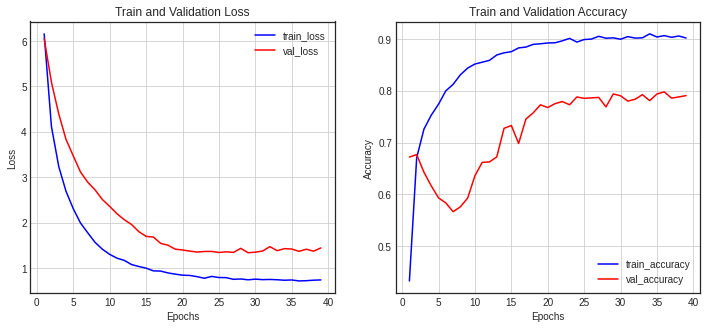

In [64]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [66]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

71/71 [==============================] - 0s 3ms/step - loss: 1.3128 - accuracy: 0.7996
test_loss: 1.3127855062484741
test_accuracy: 0.7996438145637512


* 훈련 데이터와 test 데이터의 정확도 차이가 큰 것을 보니 과적합이 좀 있는 것 같고, 모델의 성능이 떨어지는 것 같다.
* 다음에 시간이 있을 때 추가적으로 모델 성능을 개선해보도록 한다.